<a href="https://colab.research.google.com/github/frfarhath/random_forest_regression/blob/main/RANDOMFOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Step 1: Install Required Libraries
!pip install pandas openpyxl scikit-learn

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [9]:
# Step 3: Load the Dataset
from google.colab import files

In [10]:
# Upload the file
uploaded = files.upload()

Saving JAR DATASET.xlsx to JAR DATASET (1).xlsx


In [11]:
# Replace 'JAR DATASET.xlsx' with your uploaded file name
file_name = "JAR DATASET.xlsx"
data = pd.read_excel(file_name)

In [12]:
# Display the first few rows to verify data loading
print("Dataset Preview:")
print(data.head())

Dataset Preview:
         Date  Raw_Turbidity  Raw_PH  Raw_Colour  PAC  KMnO4  ACD  Turbidity  \
0  31/12/2019           90.4    7.07       500.0  2.5    0.4  0.5       19.0   
1  31/12/2019           90.4    7.07       500.0  3.0    0.4  0.5       14.2   
2  31/12/2019           90.4    7.07       500.0  3.5    0.4  0.5       12.6   
3  31/12/2019           90.4    7.07       500.0  4.0    0.4  0.5       10.6   
4  31/12/2019           90.4    7.07       500.0  4.5    0.4  0.5       10.7   

     PH  Colour  
0  7.07    48.0  
1  7.05    39.0  
2  7.02    31.0  
3  6.98    27.0  
4  6.93    29.0  


In [21]:
data.isnull()

,Date,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5101,False,False,False,False,False,False,False,False
5102,False,False,False,False,False,False,False,False
5103,False,False,False,False,False,False,False,False
5104,False,False,False,False,False,False,False,False


<Axes: >

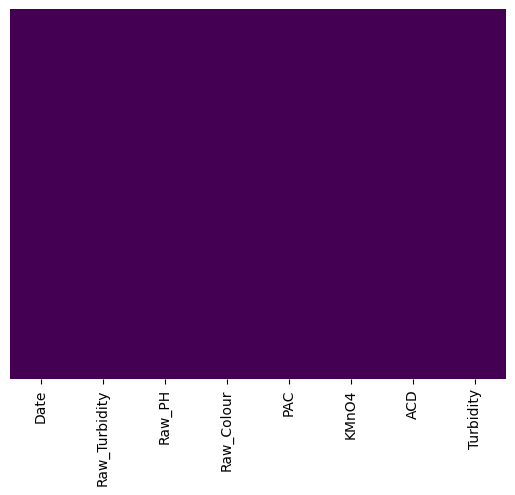

In [24]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5106 non-null   object 
 1   Raw_Turbidity  5106 non-null   float64
 2   Raw_PH         5106 non-null   float64
 3   Raw_Colour     5106 non-null   float64
 4   PAC            5106 non-null   float64
 5   KMnO4          5106 non-null   float64
 6   ACD            5106 non-null   float64
 7   Turbidity      5106 non-null   float64
dtypes: float64(7), object(1)
memory usage: 319.2+ KB


In [27]:
# Step 4: Data Preprocessing
# Drop unnecessary columns
data = data.drop(columns=["Date", "PH", "Colour"], errors="ignore")

# Display the updated dataset to confirm changes
print("\nDataset after dropping unnecessary columns:")
print(data.head())

# Check for missing values and handle them (if necessary)
if data.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    data = data.fillna(data.mean())  # Replace missing values with column means


Dataset after dropping unnecessary columns:
   Raw_Turbidity  Raw_PH  Raw_Colour  PAC  KMnO4  ACD  Turbidity
0           90.4    7.07       500.0  2.5    0.4  0.5       19.0
1           90.4    7.07       500.0  3.0    0.4  0.5       14.2
2           90.4    7.07       500.0  3.5    0.4  0.5       12.6
3           90.4    7.07       500.0  4.0    0.4  0.5       10.6
4           90.4    7.07       500.0  4.5    0.4  0.5       10.7


In [15]:
# Step 5: Define Features and Target
# Input features
features = ["Raw_Turbidity", "Raw_PH", "Raw_Colour", "PAC", "KMnO4", "ACD"]

# Target variable
target = "Turbidity"

# Split into X (features) and y (target)
X = data[features]
y = data[target]

In [28]:
# Step 6: Split Data
from sklearn.model_selection import train_test_split

# First Split: Training (80%) and Temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second Split: Testing (10%) and Validation (10%) from Temporary
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of each dataset
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 4084
Testing set size: 511
Validation set size: 511


In [29]:
# Step 7: Train Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [30]:
# Step 8: Validating
from sklearn.metrics import mean_squared_error

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Calculate Mean Squared Error for the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation Mean Squared Error: {val_mse}")

Validation Mean Squared Error: 44.50291551793829


In [31]:
# Step 9: Testing
# Make predictions on the testing set
y_test_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error for the testing set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Testing Mean Squared Error: {test_mse}")


Testing Mean Squared Error: 55.48179083289783


In [32]:
# Step 10: Make Predictions for 6 Input Rows
# Example input data for 6 rows (update these values with actual data)
input_data = {
    "Raw_Turbidity": [90.4, 90.4, 90.4, 90.4, 90.4, 90.4],  # Example values
    "Raw_PH": [7.07, 7.07, 7.07, 7.07, 7.07, 7.07],              # Example values
    "Raw_Colour": [500, 500, 500, 500, 500, 500],    # Example values
    "PAC": [2.5, 3, 3.5, 4, 4.5, 5],                 # Example values
    "KMnO4": [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],  # Example values
    "ACD": [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],                 # Example values
}

# Convert to a DataFrame
input_df = pd.DataFrame(input_data)

# Make predictions
predictions = rf_model.predict(input_df)

print("\nPredictions for the 6 input rows:")
print(predictions)


Predictions for the 6 input rows:
[20.7176 15.4001 13.8278 11.0978 11.7693 13.143 ]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation Mean Squared Error after Tuning: {val_mse}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
